### Importing Libraries

In [368]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
df=pd.read_csv('insurance.csv')

In [370]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [371]:
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [372]:
# check the rows and columns number

print("number of Rows", df.shape[0])
print("number of Columns" ,df.shape[1])

number of Rows 1338
number of Columns 7


### Missing Values

In [373]:
df.isnull().sum()
# No missing or Nan values found

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Duplicated Rows

In [374]:
df.duplicated().sum()

1

In [375]:
# dropping duplicated rows
df=df.drop_duplicates(keep='first')
print("show number of duplicated rows after removing", df.duplicated().sum())

show number of duplicated rows after removing 0


### Exploratory Data Analysis

In [376]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [377]:
# statistics for numerical values

df.describe().T.style.bar(subset=['mean'], color='#205ff5').background_gradient(subset=['std'], 
                         cmap='mako').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,1337.000000,39.222139,14.044333,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1337.000000,30.663452,6.100468,15.960000,26.290000,30.400000,34.700000,53.130000
children,1337.000000,1.095737,1.205571,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1337.000000,13279.121487,12110.359656,1121.873900,4746.344000,9386.161300,16657.717450,63770.428010


In [378]:
#check the correlation between target and other columns
df.corr()['charges']

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

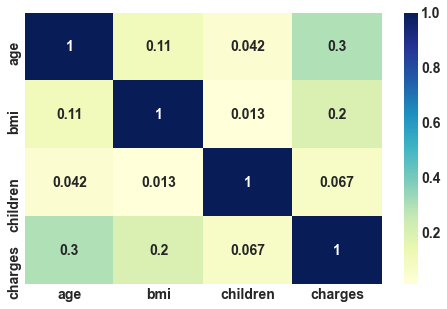

In [379]:
sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)

In [380]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



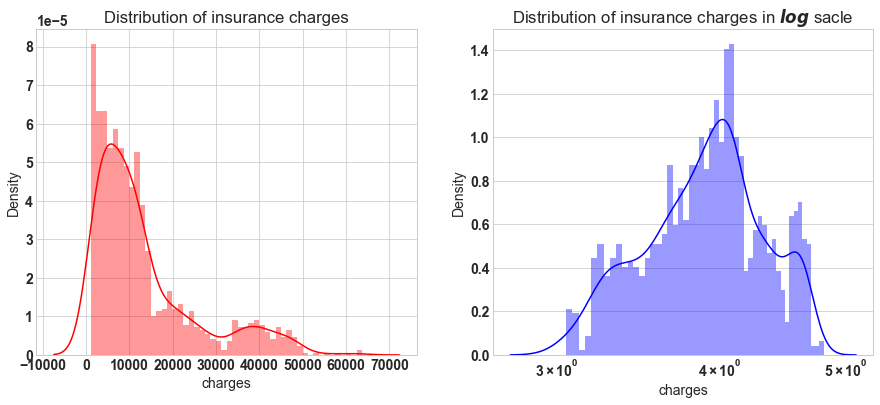

In [381]:
# check the charges distrubition

f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=50,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');


The distribution of the target is right-skewed (and it surely has outliers need to be deal with them later before modeling) so to make it closer to normal we can apply natural log, using logarithms helps having a normal distribution which could help in different ways such as outlier detection,
implementation of statistical concepts based on the central limit theorem and for the predictive model. Let's see the distrubtion of other numerical variables


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='bmi', ylabel='Density'>

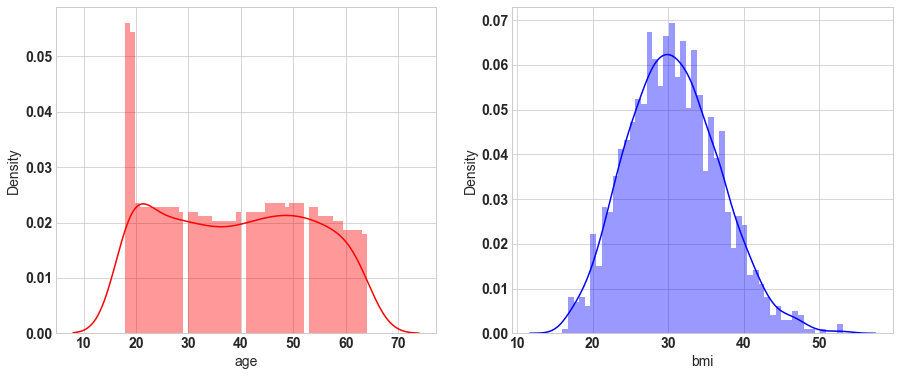

In [382]:
# Age and BMI distrubition

f= plt.figure(figsize=(15,6))

ax=f.add_subplot(121)
sns.distplot(df['age'],bins=50,color='r',ax=ax)


ax=f.add_subplot(122)
sns.distplot(df['bmi'],bins=50,color='b',ax=ax)


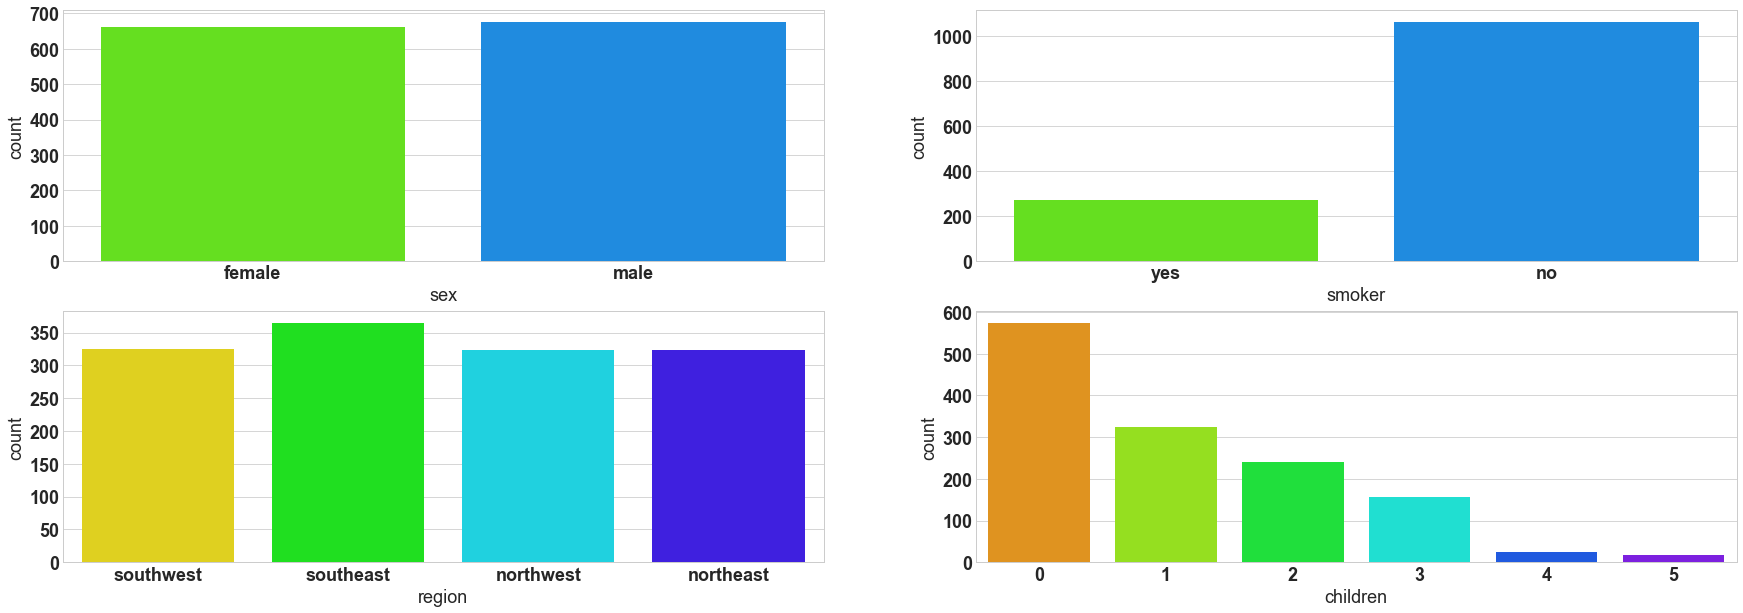

In [383]:
cat_col=["sex","smoker","region","children"]
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":18}
i=1
plt.figure(figsize=(30,60))
for col in cat_col:
    plt.subplot(11,2,i)
    sns.countplot(data=df,x=col,palette="gist_rainbow")
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18,)
    plt.xlabel(col,fontsize=18)
    plt.ylabel("count",fontsize=18)
    i=i+1

plt.show()

Text(0.5, 1.0, 'Charges vs Children number')

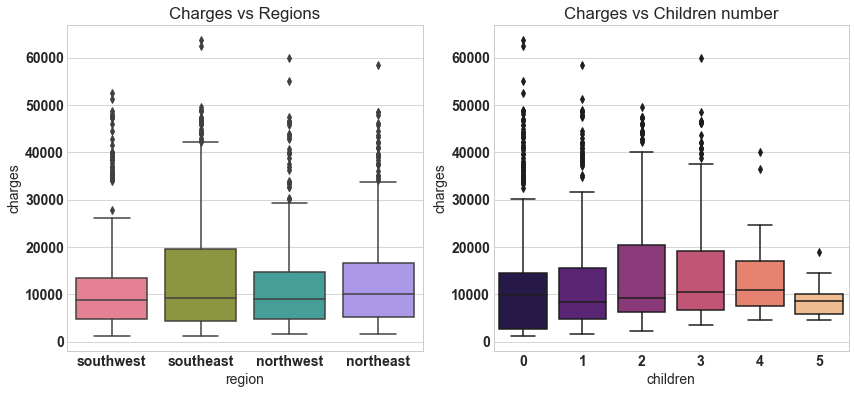

In [384]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.boxplot(x='region', y='charges',data=df,palette='husl',ax=ax)
ax.set_title('Charges vs Regions')

ax = f.add_subplot(122)
sns.boxplot(x='children', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Charges vs Children number')


In [385]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12384.695344,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


In [386]:
df.groupby('region').agg(['mean','min','max'])['charges']

,mean,min,max
region,,,
northeast,13406.384516,1694.7964,58571.07448
northwest,12450.840844,1621.3402,60021.39897
southeast,14735.411438,1121.8739,63770.42801
southwest,12346.937377,1241.5650,52590.82939


So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, number of children) let's break down analysis and see it changes

Text(0.5, 1.0, 'Charges vs smoker')

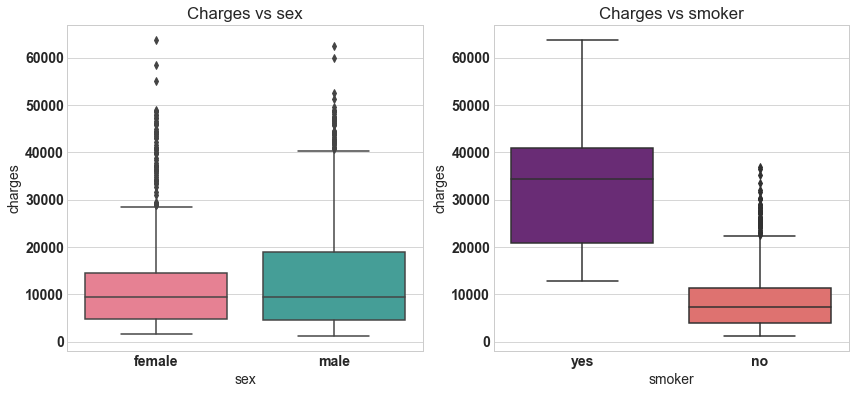

In [387]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.boxplot(x='sex', y='charges',data=df,palette='husl',ax=ax)
ax.set_title('Charges vs sex')

ax = f.add_subplot(122)
sns.boxplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Charges vs smoker')

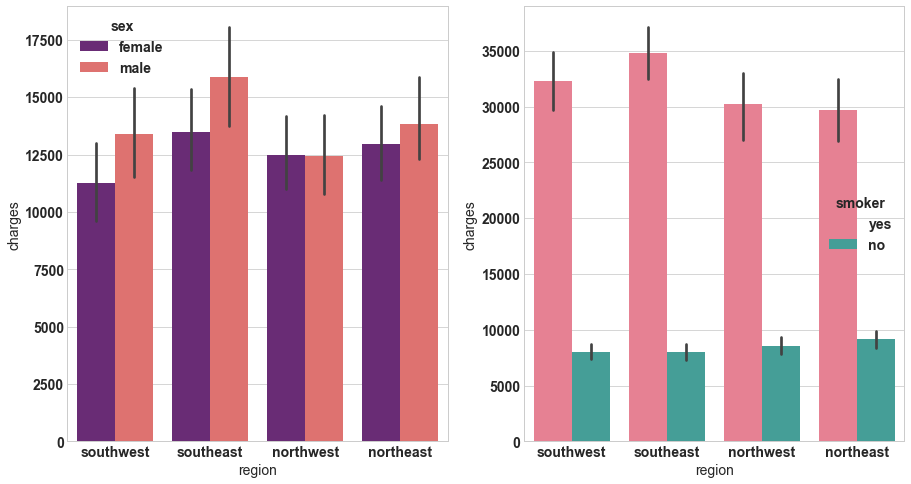

In [388]:
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(121)

ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='magma')

ax = f.add_subplot(122)
ax = sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='husl')

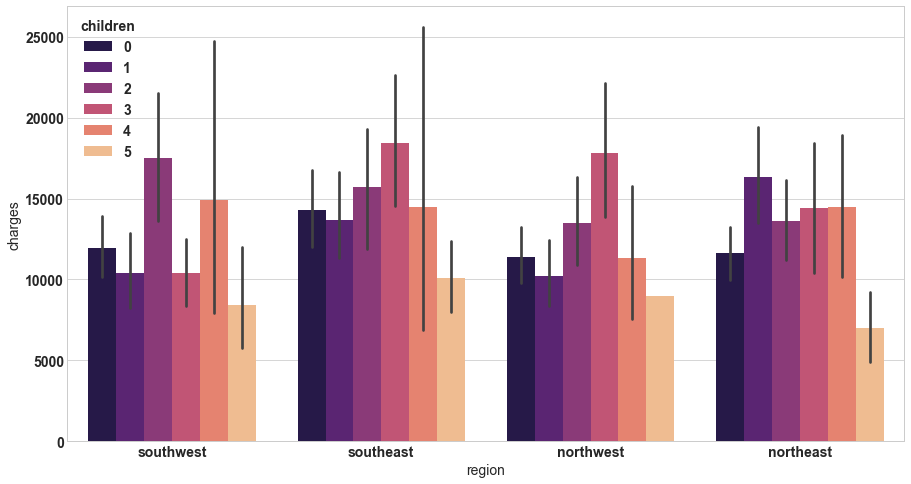

In [389]:
f, ax = plt.subplots(1, 1, figsize=(15,8))

ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='magma')

The highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.

The insurance charge for male and female is approximatley in same range.But the insurance charge for smokers is much wide range compare to non smokers.Let's analyze the medical charges by age, bmi and children according to the smoking factor

Text(17, 45000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

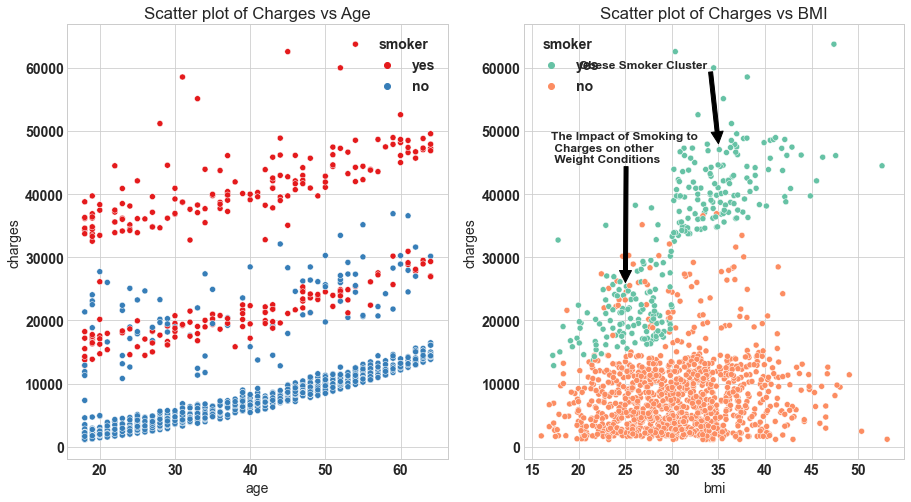

In [390]:
f = plt.figure(figsize=(15,8))

ax = f.add_subplot(121)
ax = sns.scatterplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
ax = sns.scatterplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax.set_title('Scatter plot of Charges vs BMI')
ax.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 45000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)


Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi.
In non-smokers, the cost of treatment increases with age and that makes sense. But such dependence is not seen withe smoker people, I think it would be more logical to judge having a set of data with a large number of records and signs.


We can see that patients with BMI above 30 (Obese: Body Mass Index (BMI) over 30) spend more on treatment even if they are not smokers . Let's take a look closer into Obese and smokers behaviour regardless to charges costs.

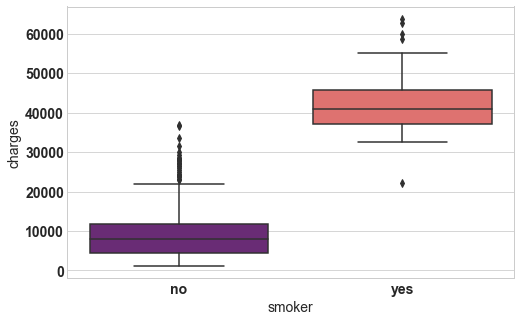

In [391]:
obese=sns.boxplot(x='smoker', y='charges',data=df[(df.bmi >=30)],palette='magma')

Most obese smokers pay around 40k in medical costs! 
Most obese non-smokers pay 8k in medical costs.
Smoking is defninitely a big factor for obese patients when it comes to medical cost. A difference of more than 30k

<AxesSubplot:xlabel='children', ylabel='charges'>

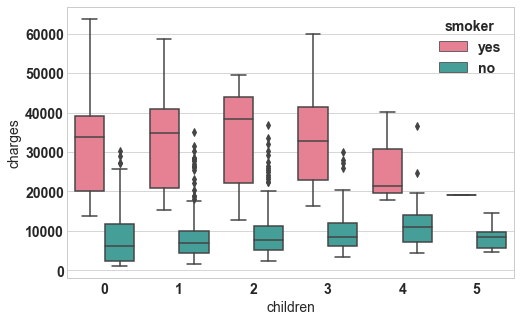

In [392]:
sns.boxplot(x='children', y='charges',data=df, hue='smoker', palette='husl')

This boxplot shows that people who have children generally smoke less. Good that non-smoking parents are much more!

### Feature Engineering

### Encoding

Since Machine learning algorithms cannot work with categorical data directly, so we must converted them to number.
Converting "sex" , "region", "smoker"
We can use multiple methods to encode categorical features such as using "map" and dictionary python or "LabelEncode" or "the class CategoricalEncoder" from Scikit-Learn

In [393]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In general, categorical variables with large variability are best encoded using OneHotEncoder and so on, but in this case, nothing will change, because there is no special order in which the regions would be listed.

In [394]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [395]:
df.corr()['charges'].sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

We confirmed what we have seen before that there is a strong correlation observed only with the fact of smoking.

It's time to predict the cost of treatment so let's start with a usual linear regression

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [397]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7438474494767134


Not so bad for a result without normalization and scaling but let's try to imporve it with data pre-processing.

### Handling Outliers

We can detect outliers by Statistical methodologies which consider to be less precise in comparison of data visually since it is the best way to detect the outliers is to demonstrate

Using Standard Deviation Method : if a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier.
There is no trivial solution for x, but usually, a value between 2 and 4 seems practicais 

The standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean.  

In [398]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [399]:
out_std(df,'charges')

The lower bound value is -23051.957482376587
The upper bound value is 49610.20045568848
Total number of outliers are 7


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



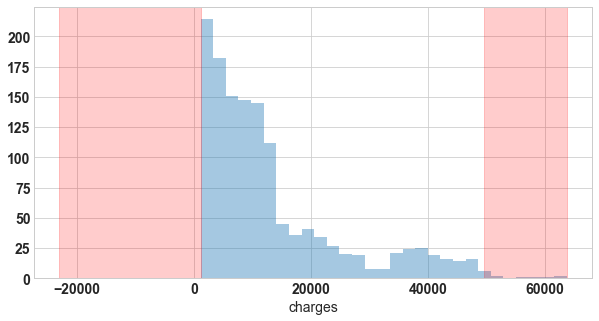

In [400]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'], kde=False)
plt.axvspan(xmin = lower,xmax= df['charges'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['charges'].max(),alpha=0.2, color='red')

The red zone represents the outlier zone! The records present in that zone are considered as outliers.

Remove the records which are above the upper bound value and records below the lower bound value!

In [401]:
df = df[(df['charges'] < upper) | (df['charges'] > lower)]

<AxesSubplot:xlabel='age'>

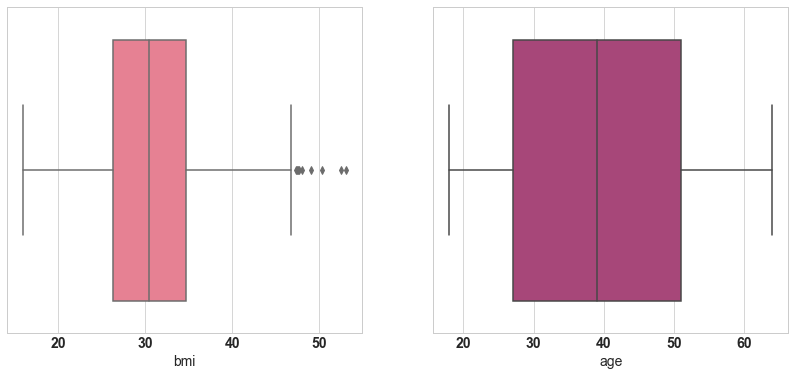

In [402]:
#checking for outlier in age and bmi columns
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.boxplot(x='bmi',data=df,palette='husl')


ax = f.add_subplot(122)
sns.boxplot(x='age', data=df,palette='magma')


no outlier is detected for age but some outliers needs to be removed for bmi

In [403]:
# With this function we detect the outliers 
def outlier(data):

    mean=data.mean()
    std=data.std()
    mini=data.min()
    maxi=data.max()

    # let find the boundaries for outlier
    highest=data.mean() + 3*data.std()
    lowest=data.mean() - 3*data.std()

    # finally, let find the outlier
    outliers=df[(data>highest) | (data<lowest)]
        
    return outliers

In [404]:
#outliers detection and remove  
new=pd.DataFrame(df["bmi"],columns=["bmi"])
for col in new.columns:
    test=outlier(df[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("\n")
    print(test)
    print("<<<<<<<<<------------------------------------->>>>>>>>>")
    df=df.drop(test.index,axis=0)                        
    #drop the outliers by thier index

columns name : bmi
numbers of outliers: 4


      age  sex    bmi  children  smoker  region     charges
116    58    1  49.06         0       0       2  11381.3254
847    23    1  50.38         1       0       2   2438.0552
1047   22    1  52.58         1       1       2  44501.3982
1317   18    1  53.13         0       0       2   1163.4627
<<<<<<<<<------------------------------------->>>>>>>>>


### Log Transform

Logarithm transformation helps to handle skewed distrubion which is the case of "charges" and after transformation, the distribution becomes more approximate to normal and also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

Since in charges have only positive values, we won't receive an error. But in other secanrio adding 1 (Log(x+1)) to data before transform it ensure the output of the transformation to be positive.

In [428]:
log_charges = np.log(df['charges'])

In [429]:
log_charges

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1333, dtype: float64

data is reading for training

### Train Test split

In [482]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable
y_log= log_charges

# train the models on training test 
# test the models on testing set
# random_state reproduce the same sequence of random numbers 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

### Import the models 

In [496]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

### Model Training

In [484]:
lr=LinearRegression()
lr.fit(X_train, y_train)

svm=SVR()
svm.fit(X_train, y_train)

rf=RandomForestRegressor()
rf.fit(X_train, y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train, y_train)

abr= AdaBoostRegressor()
abr.fit(X_train, y_train)

xg=XGBRegressor()
xg.fit(X_train, y_train)

knr=KNeighborsRegressor()
knr.fit(X_train, y_train)


KNeighborsRegressor()

In [485]:
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(learning_rate= 0.001,loss='exponential',n_estimators= 50,random_state=42),
          "GradiantBoost":GradientBoostingRegressor(criterion= 'mse',learning_rate= 0.05, loss="ls",n_estimators= 100,random_state=42),
         "RandomForest":RandomForestRegressor(criterion='mae',n_estimators=150,max_depth=8,random_state=42),
         "XgBoost": XGBRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor(metric ='minkowski',n_neighbors= 9, weights= 'distance')}

### Prediction on Test Data

In [486]:
y_pred1= lr.predict(X_test)
y_pred2= svm.predict(X_test)
y_pred3= rf.predict(X_test)
y_pred4= gr.predict(X_test)
y_pred5=abr.predict(X_test)
y_pred6=xg.predict(X_test)
y_pred7=knr.predict(X_test)

# create a new dataframe to compare the prediction values and the actual values
df_predict=pd.DataFrame({'Actual': y_test, 'Lr':y_pred1, 'svm':y_pred2,
                         'rf':y_pred3,'gr':y_pred4,'abr':y_pred5,
                        'xg': y_pred6,'knr' : y_pred7})

In [487]:
df_predict

,Actual,Lr,svm,rf,gr,abr,xg,knr
25,14001.13380,13426.544437,9502.671357,14068.507502,16615.245636,18723.968648,13682.115234,13373.680550
853,11729.67950,10881.482038,9471.840723,14223.192433,15564.843402,18243.346335,11487.966797,16476.132160
1009,9957.72160,11293.907165,9464.473804,12434.821774,11555.185253,16418.536614,12023.550781,15720.240852
369,3481.86800,4385.344129,9315.018385,16727.560128,10891.701417,9190.114236,18147.437500,18038.847228
85,21098.55405,31865.307346,9427.487624,21245.989039,22582.055174,25305.191965,26162.529297,11021.006710
...,...,...,...,...,...,...,...,...
1044,11394.06555,14940.839708,9488.645878,12045.074251,14047.508595,18243.346335,15061.242188,17908.193180
938,2304.00220,1658.962370,9313.751583,10487.712219,4892.585022,9190.114236,3730.714355,12298.920158
622,9182.17000,7294.909142,9448.551479,13040.026619,9426.444052,16418.536614,10832.846680,11942.861580
874,8891.13950,8276.374094,9421.040588,11246.188680,8129.415883,15194.633586,9004.838867,10300.448900


### Compare performance of the models Visualy

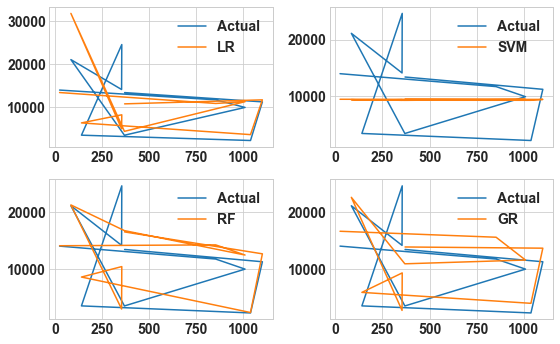

In [488]:
# 221 : 2 rows + 2 columns
# since it is too diffucult to see all the data , we use .iloc to select only a specific number

plt.subplot(221)
plt.plot(df_predict['Actual'].iloc[0:11], label='Actual')
plt.plot(df_predict['Lr'].iloc[0:11], label='LR')
plt.legend()

plt.subplot(222)
plt.plot(df_predict['Actual'].iloc[0:11], label='Actual')
plt.plot(df_predict['svm'].iloc[0:11], label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df_predict['Actual'].iloc[0:11], label='Actual')
plt.plot(df_predict['rf'].iloc[0:11], label='RF')
plt.legend()

plt.subplot(224)
plt.plot(df_predict['Actual'].iloc[0:11], label='Actual')
plt.plot(df_predict['gr'].iloc[0:11], label='GR')

plt.tight_layout()
plt.legend()

### Evaluationg the Algorithm

In [489]:
from sklearn import metrics

using R2 : is statistical measure of how close data are to the fitted regression line. The higher the adjusted squared, the higher the accuracy of our prediction line.

a value near to 0% indicated that model explains none of the variability of the response data around it's mean
a value near to 1 or 100% indicated that model explains all the variablity of the response data around the mean.


In [490]:
score_lr=  metrics.r2_score(y_test,y_pred1)
score_svm=  metrics.r2_score(y_test,y_pred2)
score_rf=  metrics.r2_score(y_test,y_pred3)
score_gr=  metrics.r2_score(y_test,y_pred4)
score_abr=  metrics.r2_score(y_test,y_pred5)
score_xg=  metrics.r2_score(y_test,y_pred6)
score_knr=  metrics.r2_score(y_test,y_pred7)

In [491]:
print(score_lr,score_svm,score_rf,score_gr, score_abr,score_xg, score_knr)

0.7533805126433056 -0.06964222294754552 0.8340430392670032 0.8681400205306962 0.7826634239236665 0.8074149247466854 0.08611700491534835


In [497]:

#this function used to evalute the models with features and terget.
def models_score(models, X_train, X_test, y_train, y_test):    
    
    scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test) 
        scores[name] =r2_score(y_test,y_pred)
        #printing the model name and accuracy !!!!!
        print("Model name: ",model)
        print("R2 score :--->>",r2_score(y_test,y_pred))
        print("MSE",mean_squared_error(y_test,y_pred))
        print("MAE",mean_absolute_error(y_test,y_pred))
        print("\n<<<<------------------------------------------------------------->>>>\n")
           
   
    model_scores = pd.DataFrame(scores, index=['R2 Score']).transpose()
    model_scores = model_scores.sort_values('R2 Score',ascending=False)
    return model_scores

In [498]:
model_scores = models_score(models, X_train, X_test, y_train, y_test)

Model name:  LinearRegression()
R2 score :--->> 0.7533805126433056
MSE 33231213.536878962
MAE 4143.007490617395

<<<<------------------------------------------------------------->>>>

Model name:  AdaBoostRegressor(learning_rate=0.001, loss='exponential', random_state=42)
R2 score :--->> 0.8683435912410798
MSE 17740294.08567554
MAE 2708.5561562462008

<<<<------------------------------------------------------------->>>>

Model name:  GradientBoostingRegressor(criterion='mse', learning_rate=0.05, random_state=42)
R2 score :--->> 0.8754979700119401
MSE 16776263.66291213
MAE 2508.8563455705207

<<<<------------------------------------------------------------->>>>

Model name:  RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=150,
                      random_state=42)
R2 score :--->> 0.8509557647285101
MSE 20083249.95657836
MAE 2298.1324581129165

<<<<------------------------------------------------------------->>>>

Model name:  XGBRegressor(base_score=0.5, booster='gbtre

using Mean Square Error : when we compare the predicted value with actual valu in test set and want it to be as minimun as possible 

 


In [500]:
model_scores
model_scores.style.bar()

,R2 Score
GradiantBoost,0.875498
AdaBoost,0.868344
RandomForest,0.850956
XgBoost,0.807415
LinearRegression,0.753381
KNeighborsRegressor,0.164491


4143.007490617395 7831.204574203958 2772.8135441535046 2583.323443163587


### Predict charges for new Customer

In [418]:
data_new ={'age':40,'sex':1, 'bmi': 40.3, 'children':4, 'smoker': 1, 'region':2}

df_new=pd.DataFrame(data_new, index=[0])

df_new

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [419]:
new_predict=gr.predict(df_new)
print(new_predict)

[48124.07581879]


### Save Model using Joblib

In [420]:
# before deployement should train model on the entire dataset since we validate the model


In [421]:
gr=GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

In [422]:
import joblib

joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [423]:
# load the model for future prediction

model= joblib.load('model_joblib_gr')
model.predict(df_new)

array([42266.02317442])

the values is slightly different because the model is trained on the entire data 

### GUI

In [424]:
from tkinter import *
import joblib

In [425]:
# to avoid 'show_entry' is not defined , let's create a logic for this function

def show_entry() : 
    
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
# load the model and perform prediction ,restoring the values into variable result

    model = joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text ="Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)
    
#start by creating and formationg the Gui Box    
master=Tk()
master.title("Insurance Cost Prediction")
label=Label(master,text="Insurance Cost Prediction",
            bg="blue", fg="white").grid(row=0, columnspan=2)

Label(master, text = "Enter Your Age ").grid(row=1)
Label(master, text = "Male Or Female [1/0] ").grid(row=2)
Label(master, text = "Enter Your BMI Value ").grid(row=3)
Label(master, text = "Enter Number of Children ").grid(row=4)
Label(master, text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master, text = "Region [1-4] ").grid(row=6)

e1 =Entry (master)
e2 =Entry (master)
e3 =Entry (master)
e4 =Entry (master)
e5 =Entry (master)
e6 =Entry (master)

e1.grid(column=1, row=1)
e2.grid(column=1, row=2)
e3.grid(column=1, row=3)
e4.grid(column=1,row=4)
e5.grid(column=1, row=5)
e6.grid(column=1, row=6)

Button(master, text='Predict', command=show_entry).grid()
mainloop()